# Regression

## Polynomial regression

### import required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### load data from source

In [2]:
df = pd.read_csv('/tmp/TvMarketing.csv')
df.head(3)

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3


### Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [4]:
df.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


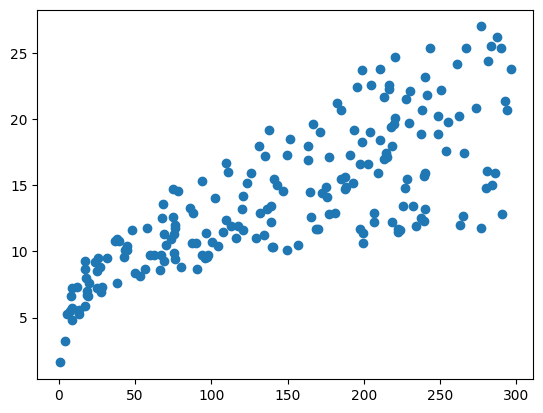

In [5]:
# plot the data
plt.scatter(df['TV'], df['Sales'])

### Data Preprocessing

In [6]:
# split the data into X and Y
X = df.drop('Sales', axis=1)
Y = df['Sales']

In [7]:
from sklearn.model_selection import train_test_split

# split the data into train and test
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, random_state=12345)

In [9]:
from sklearn.preprocessing import PolynomialFeatures

# add polynomial features
poly = PolynomialFeatures(degree=5)
poly.fit(x_train)
x_train_new = poly.transform(x_train)

### model building

In [10]:
from sklearn.linear_model import LinearRegression

# create model
model = LinearRegression()
model.fit(x_train_new, y_train)

LinearRegression()

### model evaluation

In [12]:
from sklearn.preprocessing import PolynomialFeatures

# add polynomial features
poly = PolynomialFeatures(degree=5)
poly.fit(x_test)
x_test_new = poly.transform(x_test)

In [13]:
# define y_true and y_pred
y_true = y_test
y_pred = model.predict(x_test_new)

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

In [15]:
print(f"mae = {mae}")
print(f"mse = {mse}")
print(f"rmse = {rmse}")
print(f"r2 = {r2}")

mae = 2.874226387544448
mse = 12.906081078387821
rmse = 3.5925034555846738
r2 = 0.6539834712549786


### result visualiation

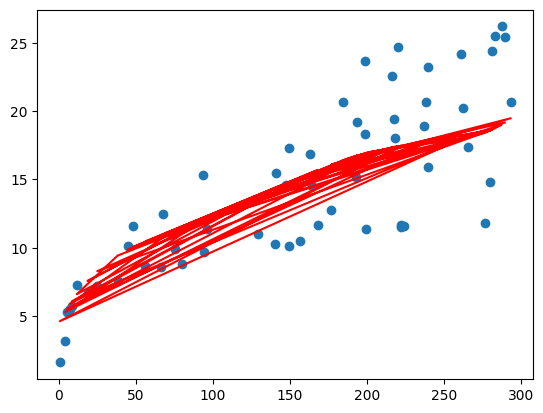

In [18]:
plt.scatter(x_test['TV'], y_test)
plt.plot(x_test['TV'], y_pred, color="red")